In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:
df1 = pd.read_csv("../Data/Day1-6 data/day_1.csv")
df2 = pd.read_csv("../Data/Day1-6 data/day_2.csv")
df3 = pd.read_csv("../Data/Day1-6 data/day_3.csv")
df4 = pd.read_csv("../Data/Day1-6 data/day_4.csv")
df5 = pd.read_csv("../Data/Day1-6 data/day_5.csv")
df6 = pd.read_csv("../Data/Day1-6 data/day_6.csv")

In [3]:
# Combine df
dfs = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)

# Extract time features
dfs['Time'] = pd.to_timedelta(dfs['Time'])
dfs['Hour'] = dfs['Time'].dt.total_seconds() / 3600.0



In [4]:
dfs['Length'].max()

bins = [0, 300, 800, 4000, 18000]
labels = ['0-300', '301-800', '801-4000', '4001-18000']
dfs['Length_Range'] = pd.cut(dfs['Length'], bins=bins, labels=labels)


In [5]:
label_encoder = LabelEncoder()
dfs['Device IP'] = label_encoder.fit_transform(dfs['Device IP'])  

# Define features and target
X = dfs[['Hour', 'Device IP']]  
y_class = dfs[['Length_Range']]
y_regress = dfs[['Length']]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_regress, test_size=0.2, random_state=42)



**Classification**

Random Forest Classifier

In [6]:
# Initialize Random Forest Classifier model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Evaluate the models
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

       0-300       0.73      0.72      0.72     15390
     301-800       0.14      0.13      0.13      1126
  4001-18000       0.30      0.23      0.26       233
    801-4000       0.44      0.46      0.45      6668

    accuracy                           0.61     23417
   macro avg       0.40      0.38      0.39     23417
weighted avg       0.61      0.61      0.61     23417

[[11101   666    58  3565]
 [  717   141     5   263]
 [  132     0    54    47]
 [ 3345   184    61  3078]]


SVM (Don't Use)

In [18]:
# Initialize and train the SVM model
svm_model = SVC(kernel='linear') 
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred_svm = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(re

              precision    recall  f1-score   support

       0-100       0.50      1.00      0.66     11607
     101-500       0.00      0.00      0.00      4355
  4001-18000       0.00      0.00      0.00       233
    501-4000       0.00      0.00      0.00      7222

    accuracy                           0.50     23417
   macro avg       0.12      0.25      0.17     23417
weighted avg       0.25      0.50      0.33     23417

[[11607     0     0     0]
 [ 4355     0     0     0]
 [  233     0     0     0]
 [ 7222     0     0     0]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Logistic Regression

In [7]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(multi_class='ovr')  # 'ovr' for One-vs-Rest strategy
log_reg.fit(X_train, y_train)

# Evaluate the model
y_pred_lr = log_reg.predict(X_test)
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(re

              precision    recall  f1-score   support

       0-300       0.66      1.00      0.79     15390
     301-800       0.00      0.00      0.00      1126
  4001-18000       0.00      0.00      0.00       233
    801-4000       0.00      0.00      0.00      6668

    accuracy                           0.66     23417
   macro avg       0.16      0.25      0.20     23417
weighted avg       0.43      0.66      0.52     23417

[[15390     0     0     0]
 [ 1126     0     0     0]
 [  233     0     0     0]
 [ 6668     0     0     0]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

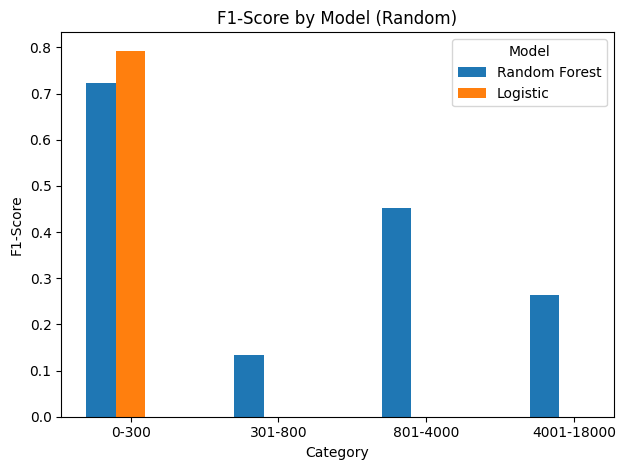

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming report_rf, report_svm, report_lr are dictionaries with F1 scores for models
# Example structure: {'0-300': {'f1-score': 0.9}, '301-800': {'f1-score': 0.8}, ...}

categories = ['0-300', '301-800', '801-4000', '4001-18000']
f1_scores_by_model = {'Random Forest': [],  'Logistic': []}

# Fill the scores for each model
for category in categories:
    f1_scores_by_model['Random Forest'].append(report_rf[category]['f1-score'])
    f1_scores_by_model['Logistic'].append(report_lr[category]['f1-score'])

# Number of groups and bar width
n_groups = len(categories)
bar_width = 0.2

# Create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)

# Plotting each set of bars for each model
for i, (model_name, scores) in enumerate(f1_scores_by_model.items()):
    ax.bar(index + i * bar_width, scores, bar_width, label=model_name)

# Set labels, title, and ticks
ax.set_xlabel('Category')
ax.set_ylabel('F1-Score')
ax.set_title('F1-Score by Model (Random)')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(categories)

# Add legend
ax.legend(title="Model")

# Other plot settings
plt.tight_layout()
plt.show()


**Regression**

Random Forest Regressor

In [19]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_reg_train)
y_rfreg_pred = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_reg_test, y_rfreg_pred)
r2_rf = r2_score(y_reg_test, y_rfreg_pred)
print("Random Forest MSE:", mse_rf)
print("Random Forest R2:", r2_rf)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest MSE: 1018322.0257841749
Random Forest R2: 0.03527431590869878


Linear Regression

In [16]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_reg_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_reg_test, y_pred_linear)
r2_linear = r2_score(y_reg_test, y_pred_linear)

print("Linear Regression MSE:", mse_linear)
print("Linear Regression R2:", r2_linear)

Linear Regression MSE: 1013798.3827928378
Linear Regression R2: 0.03955987044734488


Gradient Boosting Regressor

In [20]:
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_reg_train)
y_pred_gb = gb_reg.predict(X_test)
mse_gb = mean_squared_error(y_reg_test, y_pred_gb)
r2_gb = r2_score(y_reg_test, y_pred_gb)

print("Gradient Boosting Regressor MSE:", mse_gb)
print("Gradient Boosting Regressor R2:", r2_gb)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Regressor MSE: 748602.9155200239
Gradient Boosting Regressor R2: 0.29079756550325153
